### Reading the Test Image

In [2]:
import numpy as np
import cv2
import tensorflow as tf
from PIL import Image

import matplotlib.pyplot as plt

In [70]:
# read using opencv
image_cv = cv2.imread("assets/orange.jpg")
image_cv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)

# read using tensorflow
image_tf = tf.io.read_file("assets/orange.jpg")
# image_tf = tf.image.decode_jpeg(image_tf, channels=3)

# use integer accurate decrompression method, so the image is readed from opencv will be same as the image that readed from tensorflow
image_tf = tf.image.decode_jpeg(image_tf, channels=3, dct_method='INTEGER_ACCURATE')

# read using pillow
image_pil = Image.open("assets/orange.jpg")
image_pil = np.asarray(image_pil)

### Subtracting the readed images

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  24  28 225 231 233 234 235 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255]


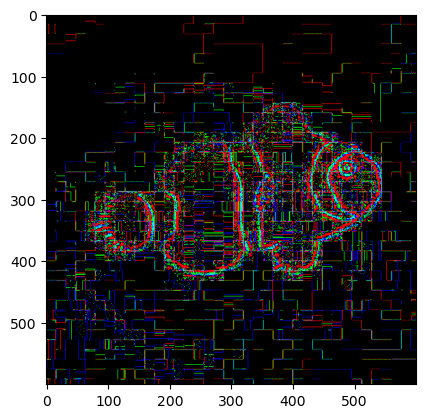

In [75]:
image_diff = np.abs(image_tf-image_pil)
print(np.unique(image_diff))
plt.imshow(image_diff)
plt.show()

### Resizing Images Using OpenCV

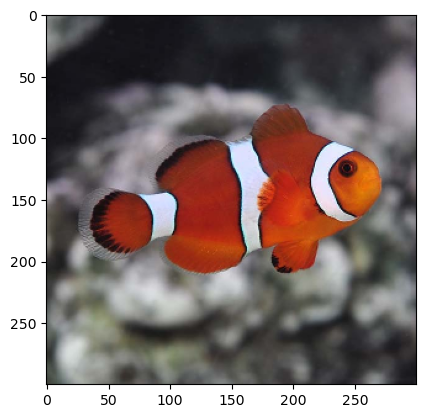

In [63]:
image_cv_resized = cv2.resize(image_cv,(300,300), interpolation=cv2.INTER_NEAREST)

plt.imshow(image_cv_resized)
plt.show()

### Resizing Image using Tensorflow

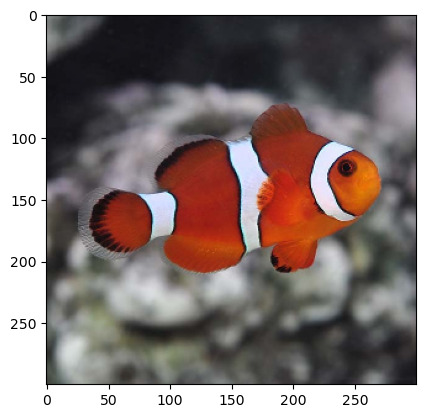

In [64]:
# doing bilinear resize
image_tf_resized = tf.image.resize(image_tf, (300, 300), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

# convert resized_image dtype
image_tf_resized = tf.image.convert_image_dtype(image_tf_resized, dtype=tf.uint8)

plt.imshow(image_tf_resized)
plt.show()


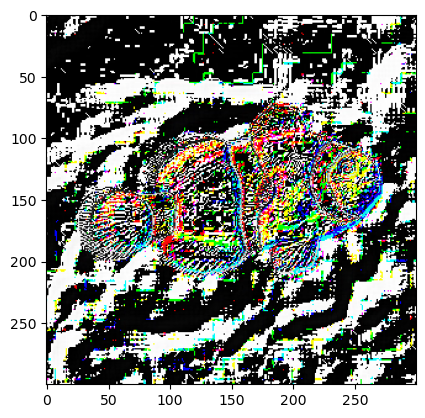

In [65]:
image_diff = np.abs(image_cv_resized-image_tf_resized)
plt.imshow(image_diff)
plt.show()